In [1]:
# Import the necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import numpy as np
from collections import Counter

In [2]:
df = pd.read_csv(r"C:\Users\HENRY OKEOMA\Downloads\Dune Sales Data (1).csv")

In [3]:
# Call the dataframe
df.head(3)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price
0,19-Feb-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.00,109.0
1,20-Feb-16,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.50,28.5
2,27-Feb-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,3.67,5.0


In [4]:
# Checking the numerical column stats
df.describe().astype(int)

,Customer_Age,Quantity,Unit_Cost,Unit_Price
count,34867,34866,34866,34866
mean,36,2,349,389
std,11,0,490,525
min,17,1,0,0
25%,28,1,45,53
50%,35,2,150,179
75%,44,3,455,521
max,87,3,3240,5082


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              34866 non-null  object 
 1   Customer          34866 non-null  object 
 2   Sales Person      34866 non-null  object 
 3   Customer_Age      34867 non-null  int64  
 4   Customer_Gender   34866 non-null  object 
 5   State             34866 non-null  object 
 6   Product_Category  34866 non-null  object 
 7   Sub_Category      34866 non-null  object 
 8   Payment Option    34866 non-null  object 
 9   Quantity          34866 non-null  float64
 10  Unit_Cost         34866 non-null  float64
 11  Unit_Price        34866 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 3.2+ MB


In [6]:
# Check for duplicated values
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
34862    False
34863    False
34864    False
34865    False
34866    False
Length: 34867, dtype: bool

In [7]:
# Count Duplicates
df.duplicated().sum()

1

In [8]:
# Drop Duplicates
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

In [10]:
#Count Missing Values
df.isna().sum().sum()

11

In [12]:
# Drop the missing values as this is just in one row
df.dropna(how='any', inplace=True)
df.tail(2)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price
34864,5-Apr-15,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,3.0,683.0,560.67
34865,30-Aug-15,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,1.0,2320.0,1568.00


In [13]:
# Check if missing values have been dropped
df.isna().sum().sum()

0

In [18]:
# Group Customer age
def age_group(x):
    if x <= 25:
        return 'young adults <25'
    elif x <=40:
        return 'adults 25-40'
    elif x <= 55:
        return 'old adults 41-55'
    else:
        return 'Elderly 56+'

df['age_group'] = df['Customer_Age'].apply(age_group)

In [19]:
df.tail(2)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price,age_group
34864,5-Apr-15,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,3.0,683.0,560.67,adults 25-40
34865,30-Aug-15,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,1.0,2320.0,1568.00,adults 25-40


In [20]:
# Convert the Date to Date time object
df['Date'] = pd.to_datetime(df['Date'])

In [21]:
# Convert Date to date to time

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Month_name'] = df['Date'].dt.month_name()
df['Day_name'] = df['Date'].dt.day_name()
df['Quarter'] = df['Date'].dt.quarter
df.head(3)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price,age_group,Year,Month,Month_name,Day_name,Quarter
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.00,109.0,adults 25-40,2016,2,February,Friday,1
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.50,28.5,adults 25-40,2016,2,February,Saturday,1
2,2016-02-27,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,3.67,5.0,adults 25-40,2016,2,February,Saturday,1


In [22]:
df['Year'] = df['Year'].astype(int, errors='ignore')

In [23]:
df.head(2)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price,age_group,Year,Month,Month_name,Day_name,Quarter
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.0,109.0,adults 25-40,2016,2,February,Friday,1
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.5,28.5,adults 25-40,2016,2,February,Saturday,1


In [24]:
# Create a a new column as Cost and a New Column a Revenue
df['Cost'] = df['Quantity']*df['Unit_Cost']
df['Revenue'] = df['Quantity']*df['Unit_Price']


df.head(2)


,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price,age_group,Year,Month,Month_name,Day_name,Quarter,Cost,Revenue
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.0,109.0,adults 25-40,2016,2,February,Friday,1,80.0,109.0
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.5,28.5,adults 25-40,2016,2,February,Saturday,1,49.0,57.0


In [25]:
# Create a new column as Profit
df['Profit'] = df['Revenue'] - df['Cost']
df.head(3)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,...,Unit_Price,age_group,Year,Month,Month_name,Day_name,Quarter,Cost,Revenue,Profit
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,...,109.0,adults 25-40,2016,2,February,Friday,1,80.00,109.0,29.00
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,...,28.5,adults 25-40,2016,2,February,Saturday,1,49.00,57.0,8.00
2,2016-02-27,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,...,5.0,adults 25-40,2016,2,February,Saturday,1,11.01,15.0,3.99


In [26]:
# Define Profit or Loss for each Column
def porl(x):
    if x >= 0:
        return 'Profit'
    else:
        return 'Loss'
df['P/L'] = df['Profit'].apply(porl)
df.tail(3)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,...,age_group,Year,Month,Month_name,Day_name,Quarter,Cost,Revenue,Profit,P/L
34863,2015-03-13,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,1.0,...,adults 25-40,2015,3,March,Friday,1,2049.0,1583.00,-466.00,Loss
34864,2015-04-05,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,3.0,...,adults 25-40,2015,4,April,Sunday,2,2049.0,1682.01,-366.99,Loss
34865,2015-08-30,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,1.0,...,adults 25-40,2015,8,August,Sunday,3,2320.0,1568.00,-752.00,Loss


In [27]:
# Create a New Column as Season
def Season(x):
    if x == 'March':
        return 'Dry'
    elif x == 'April':
        return 'Rainy'
    elif x == 'May':
        return 'Rainy'
    elif x ==  'June':
        return 'Rainy'
    elif x ==  'July':
        return 'Rainy'
    elif x ==  'August':
        return 'Rainy'
    elif x == 'September':
        return 'Rainy'
    elif x == 'October':
        return 'Dry' 
    elif x == 'November':
        return 'Dry'
    elif x == 'December':
        return 'Dry'
    elif x == 'January':
        return 'Dry'
    elif x == 'February':
        return 'Dry'

df['Season'] = df['Month_name'].apply(Season)
df.head(3)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,...,Year,Month,Month_name,Day_name,Quarter,Cost,Revenue,Profit,P/L,Season
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,...,2016,2,February,Friday,1,80.00,109.0,29.00,Profit,Dry
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,...,2016,2,February,Saturday,1,49.00,57.0,8.00,Profit,Dry
2,2016-02-27,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,...,2016,2,February,Saturday,1,11.01,15.0,3.99,Profit,Dry


## UNIVARIATE ANALYSIS of the CATEGORICAL DATA

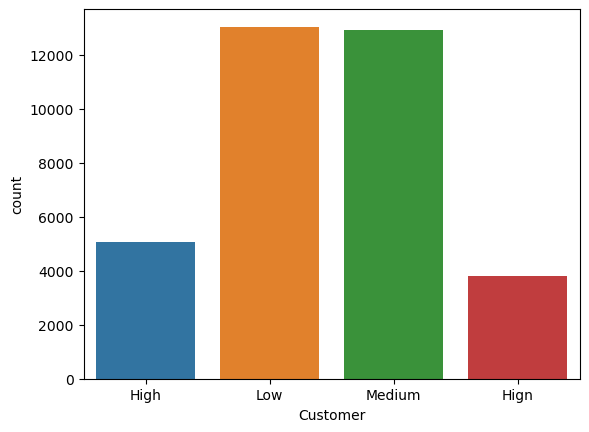

In [28]:
# Count of Customer Types in our data set
sns.countplot(x='Customer', data=df);

#### We have a wrongly spelt word as hign, as against High.

In [29]:
# Clean up the Wrong Spelt words
df[df['Customer'] == 'Hign'].head(2)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,...,Year,Month,Month_name,Day_name,Quarter,Cost,Revenue,Profit,P/L,Season
29770,2015-08-03,Hign,Derick,28,F,Lagos,Phones,IPhone,Cash,1.0,...,2015,8,August,Monday,3,2295.0,2136.0,-159.0,Loss,Rainy
29771,2015-08-04,Hign,Derick,28,F,Lagos,Accessories,Keyboard,Cash,2.0,...,2015,8,August,Tuesday,3,35.0,39.0,4.0,Profit,Rainy


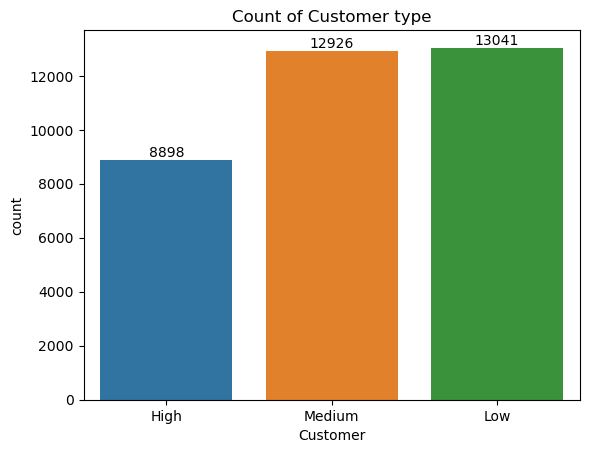

In [30]:
# Locate the Mispelpt Values with loc

plt.title('Count of Customer type')
df.loc[df['Customer'] == 'Hign', 'Customer'] = 'High'
ax = sns.countplot(x='Customer', data=df, order=df['Customer'].value_counts(ascending=True).index)
values = df['Customer'].value_counts(ascending=True).values
ax.bar_label(container=ax.containers[0], label=values);


### Insight: Low customers are higher in all customer types

In [31]:
# The count of sales persons
df['Sales Person'].value_counts(ascending=True)

Kenny       3396
Derick      3712
Segun       3787
Suleman     4618
Feyisola    6129
Chinazam    6556
Remota      6667
Name: Sales Person, dtype: int64

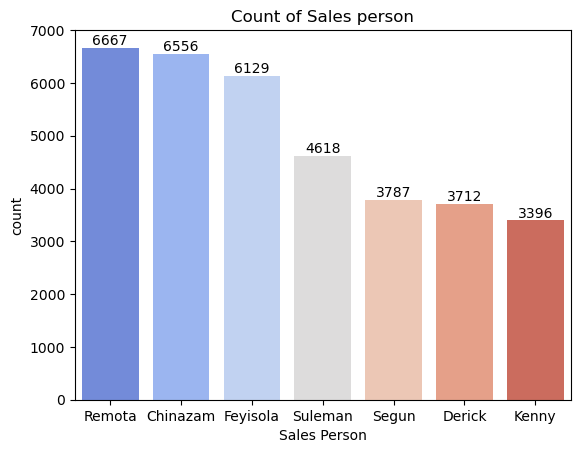

In [32]:
# Visualise the counts of Sales persons

plt.title('Count of Sales person')
ax = sns.countplot(x=df['Sales Person'], data=df, order=df['Sales Person']\
                   .value_counts(ascending=False).index, palette='coolwarm')
values = df['Sales Person'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);

### Insight: Remota and Chinazam are topping the list while Kenny and Derick are trailing.

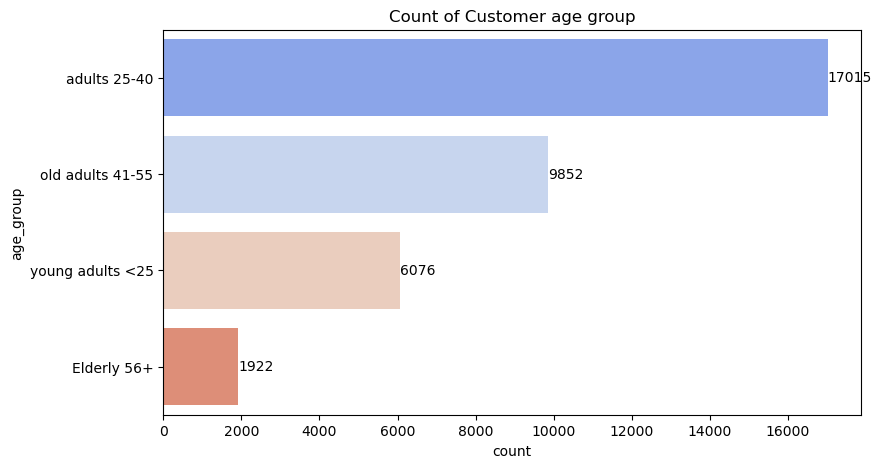

In [33]:
# Total Transaction from Customer Age_Group
plt.figure(figsize=(9,5))

plt.title('Count of Customer age group')
ax = sns.countplot(y=df['age_group'], data=df, order=df['age_group']\
                   .value_counts(ascending=False).index, palette='coolwarm')
values = df['age_group'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);

### Insight: Adults are more in number among the customer age groups

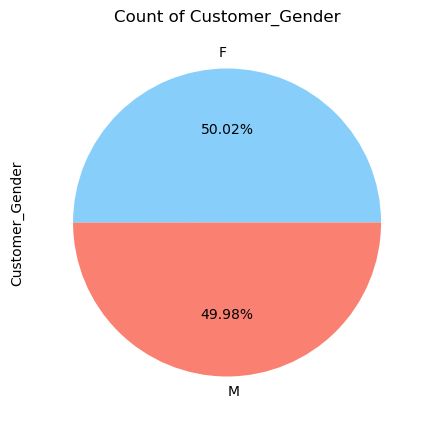

In [34]:
# Total Transacion by Customer Gender
plt.figure(figsize =(10,5))
df['Customer_Gender'].value_counts(normalize=True).plot.pie(autopct="%1.2f%%", colors = ['lightskyblue', 'salmon'])
plt.title("Count of Customer_Gender");

### Insight: Almost an equal number of customer by gender.

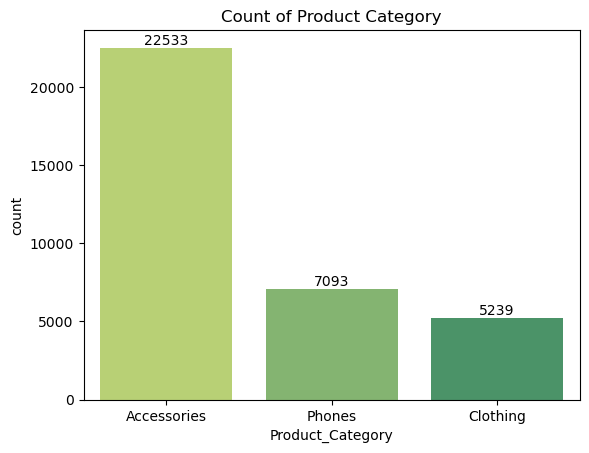

In [35]:
# Product category, Sub-category, Payment options

plt.title('Count of Product Category')
ax = sns.countplot(x=df['Product_Category'], data=df, order=df['Product_Category'].value_counts(ascending=False)\
                   .index, palette='summer_r')
values = df['Product_Category'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);

### Insight: In the Product category, Accessories are mostly sold item

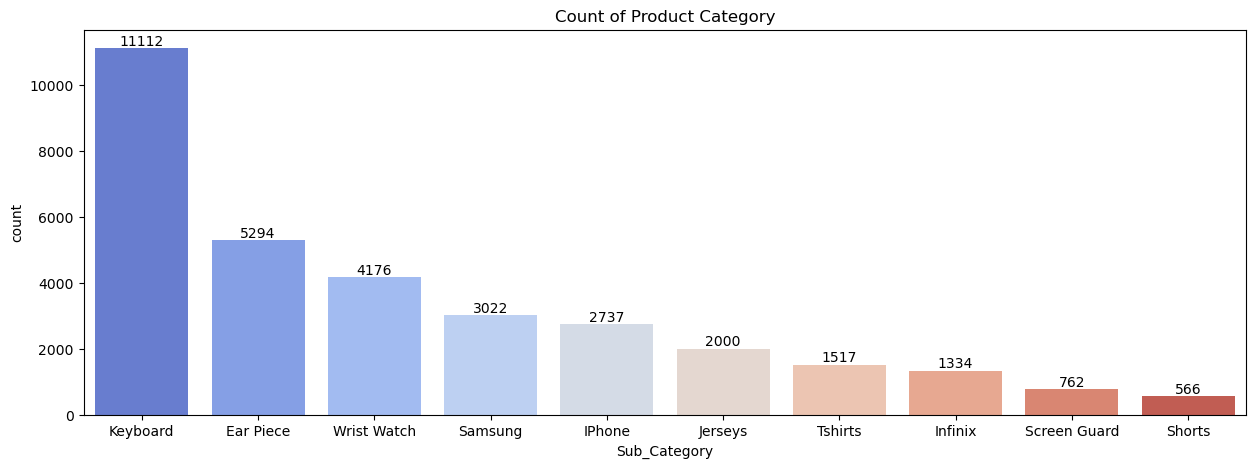

In [36]:
# Sub- Category (Top 10)
plt.figure(figsize=(15,5))

plt.title('Count of Product Category')
top_ten = df['Sub_Category'].value_counts().head(10)
ax = sns.countplot(x=df['Sub_Category'], data=df, order=top_ten.index, palette='coolwarm')
values = df['Sub_Category'].value_counts(ascending=False).head(10)
ax.bar_label(container=ax.containers[0], labels=values);

### Insight: On the Sub-Category, keyboard, Ear piece and wrist watch are mostly sold looking at the top 10.

In [37]:
df['Sub_Category'].value_counts()

Keyboard          11112
Ear Piece          5294
Wrist Watch        4176
Samsung            3022
IPhone             2737
Jerseys            2000
Tshirts            1517
Infinix            1334
Screen Guard        762
Shorts              566
Memory Card         545
Polo shirts         480
Mouse               396
Socks               364
Vests               312
Laptop Charger      145
Phone Charger       103
Name: Sub_Category, dtype: int64

In [38]:
bottom_seven = df['Sub_Category'].value_counts().tail(7)
bottom_seven


Memory Card       545
Polo shirts       480
Mouse             396
Socks             364
Vests             312
Laptop Charger    145
Phone Charger     103
Name: Sub_Category, dtype: int64

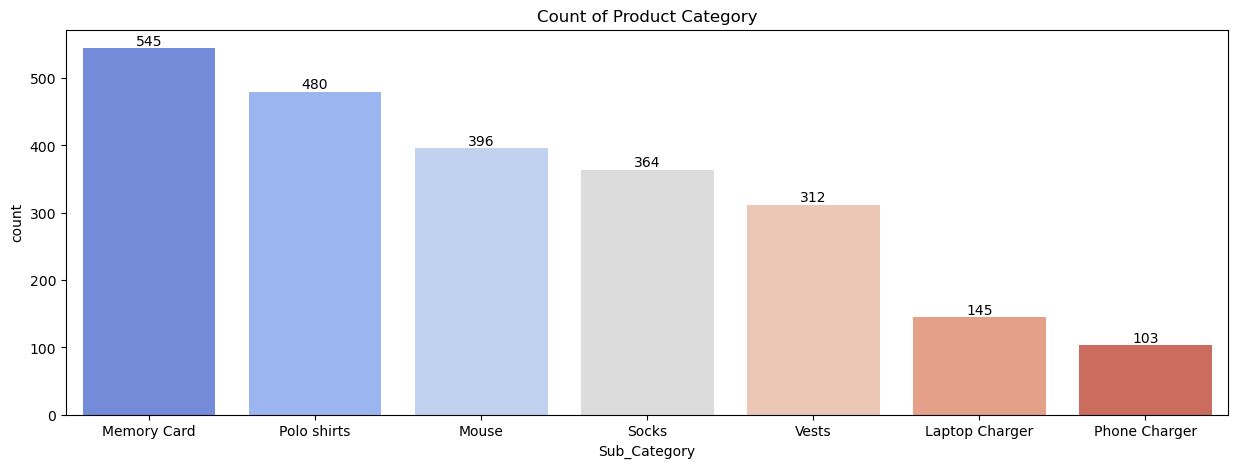

In [39]:
# We shall also plot the bottom 7 Subcategory
plt.figure(figsize=(15,5))
plt.title("Count of Product Category");

bottom_seven = df['Sub_Category'].value_counts().tail(7)
ax = sns.countplot(x=df['Sub_Category'], data=df, order=bottom_seven.index, palette='coolwarm')
values = df['Sub_Category'].value_counts(ascending=False).tail(7)
ax.bar_label(container=ax.containers[0], labels=values);

### Insight: Phone and Laptop chargers are rarely purchased, they stand as the bottom sub-category

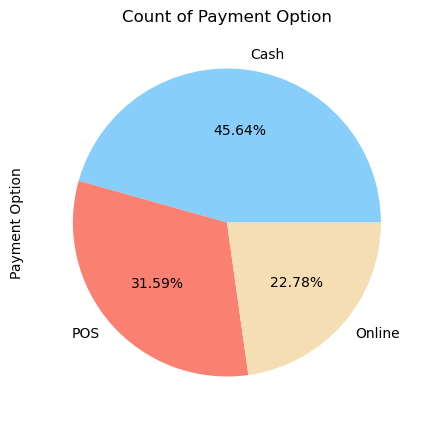

In [40]:
# Count of Payment Options

plt.figure(figsize =(10,5))
df['Payment Option'].value_counts(normalize=True).plot.pie(autopct="%1.2f%%", colors = ['lightskyblue', 'salmon', 'wheat'])
plt.title("Count of Payment Option");

#ax = sns.countplot(x=df['Payment Option'], data=df, order=df['Payment Option'].value_counts(ascending=True).index)
#values = df['Payment Option'].value_counts(ascending=True).values
#ax.bar_label(container=ax.containers[0], labels=values);

### Insight: Cash Payment option has the highest number while online sales have the least

In [41]:
df['Payment Option'].value_counts(ascending=False)

Cash      15911
POS       11013
Online     7941
Name: Payment Option, dtype: int64

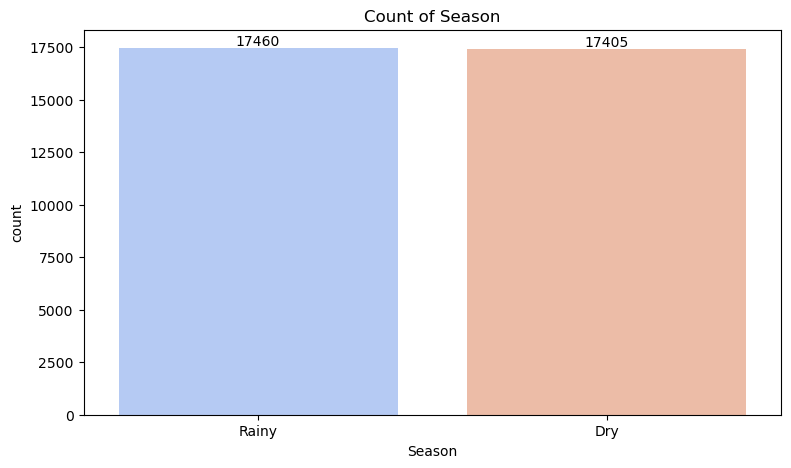

In [42]:
# Count of Season
plt.figure(figsize=(9,5))

plt.title('Count of Season')
ax = sns.countplot(x=df['Season'], data=df, order=df['Season']\
                   .value_counts(ascending=False).index, palette='coolwarm')
values = df['Season'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);


### Insight:Almost an equal distribution of the 2 seasons in Nigeria. Although Rainy is slightly more

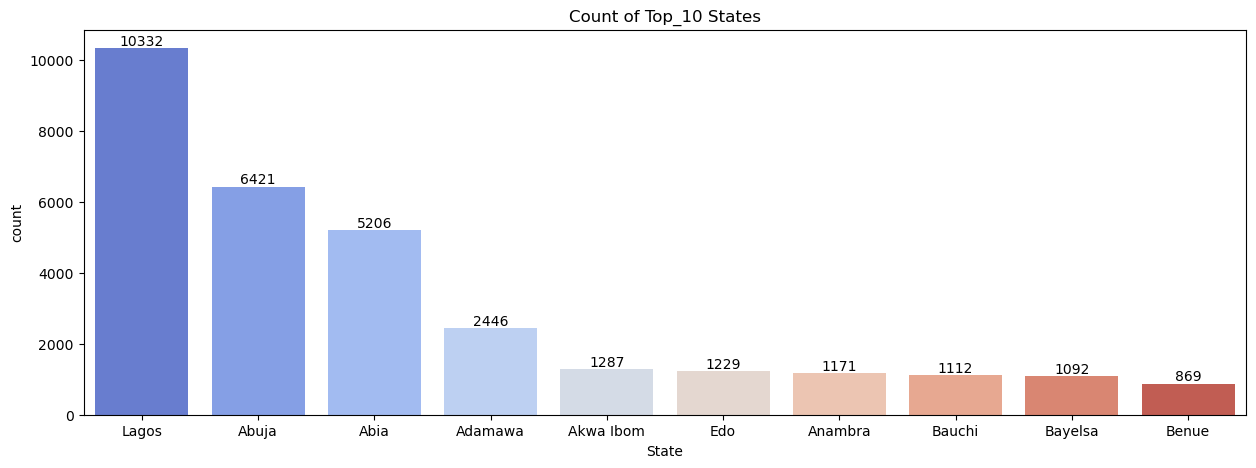

In [43]:
# Count of States
plt.figure(figsize=(15,5))

plt.title("Count of Top_10 States");
top_ten = df['State'].value_counts().head(10)
ax = sns.countplot(x=df['State'], data=df, order=top_ten.index, palette='coolwarm')
values = df['State'].value_counts(ascending=False).head(10)
ax.bar_label(container=ax.containers[0], labels=values);

### Insight: Lagos is very prominent followed by Abuja and Abia

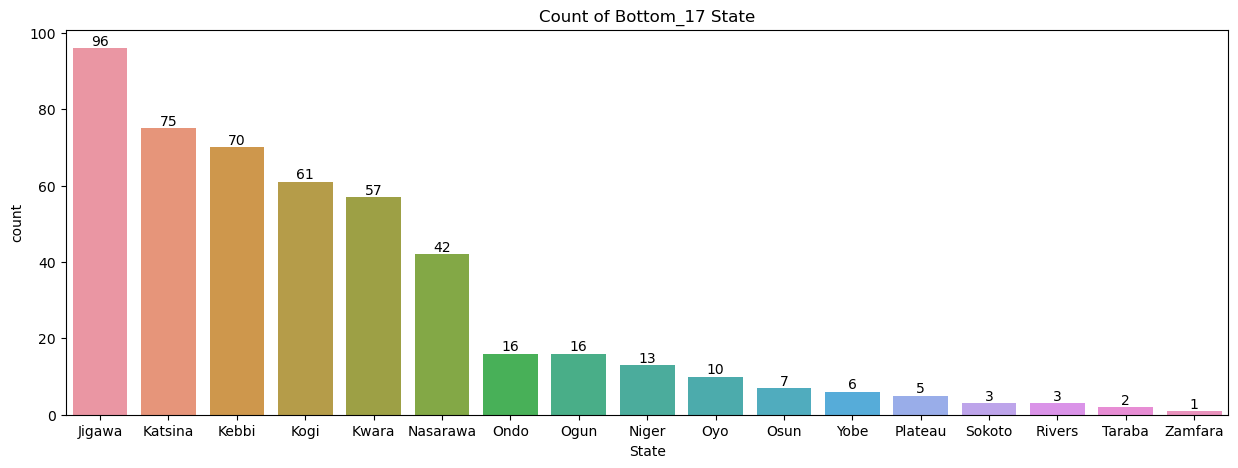

In [44]:
#Bottom State
plt.figure(figsize=(15,5))
plt.title("Count of Bottom_17 State");
bottom_17 = df['State'].value_counts().tail(17)
ax = sns.countplot(x=df['State'], data=df, order=bottom_17.index)
values = df['State'].value_counts(ascending=False).tail(17)
ax.bar_label(container=ax.containers[0], labels=values);

### Insight: Sokoto, Rivers, taraba and Zamfara have almost no activity.

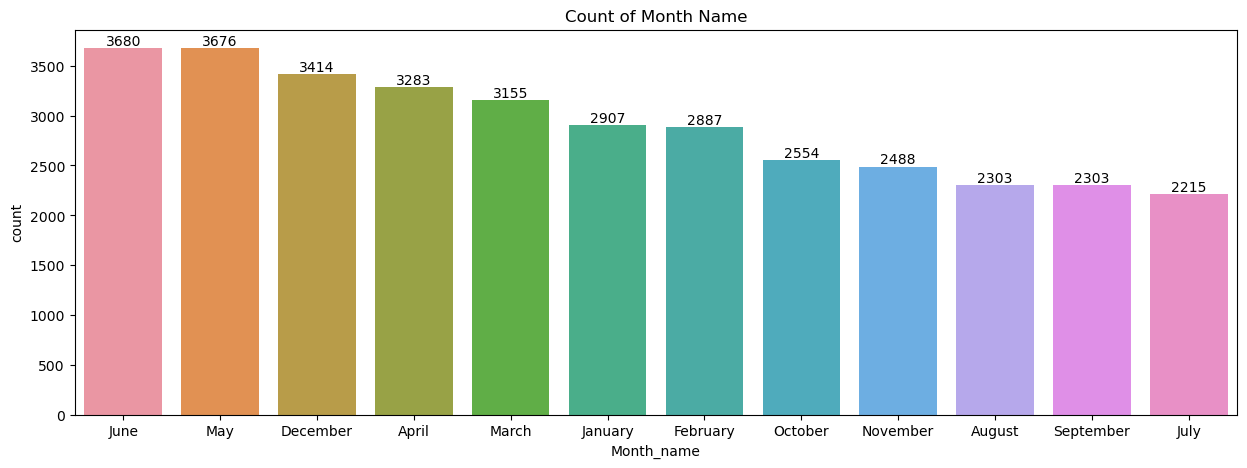

In [45]:
# Count of Month Name
plt.figure(figsize=(15,5))
plt.title("Count of Month Name");

ax = sns.countplot(x=df['Month_name'], data=df, order=df['Month_name'].value_counts().index)
values = df['Month_name'].value_counts()
ax.bar_label(container=ax.containers[0], labels=values);

### Insights: June is returning the highest,  although we eaerlier found that Spring (Mar, April & may) were the highest in season

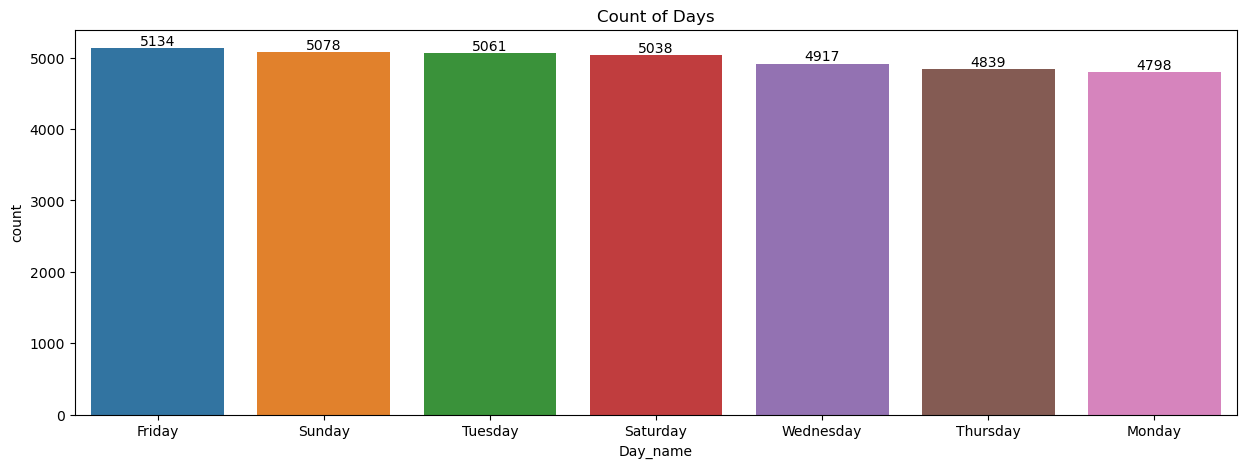

In [46]:
# Count of Days
plt.figure(figsize=(15,5))
plt.title("Count of Days");

ax = sns.countplot(x=df['Day_name'], data=df, order=df['Day_name'].value_counts().index)
values = df['Day_name'].value_counts()
ax.bar_label(container=ax.containers[0], labels=values);

### Insight: Friday and Sunday are the most for days.

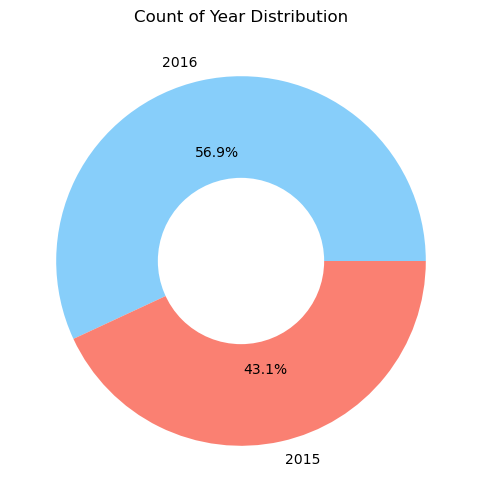

In [47]:
Year_counts = df['Year'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(Year_counts, labels=Year_counts.index, autopct='%1.1f%%', colors= ['lightskyblue', 'salmon'])

# draw circle
centre_circle = plt.Circle((0, 0), 0.45, fc='white')
fig = plt.gcf() 
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
# Adding Title of chart
plt.title('Count of Year Distribution'); 
# Displaying Chart
plt.show()

### Insight: We have more orders in 2016 than in 2015

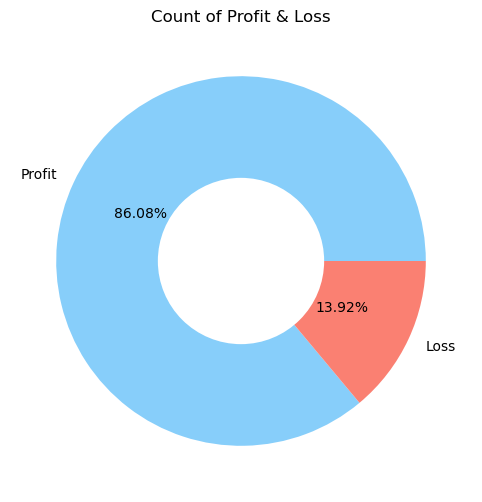

In [48]:
# Total Transaction by Profit or Loss
fig,ax = plt.subplots(figsize=(8,6))
count = Counter(df['P/L'])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%', colors= ['lightskyblue', 'salmon'])
ax.set_title('Percentage of Transactions by Profit or Loss')


# draw circle
centre_circle = plt.Circle((0, 0), 0.45, fc='white')
fig = plt.gcf() 
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
# Adding Title of chart
plt.title('Count of Profit & Loss'); 
# Displaying Chart
plt.show()

### Insight: There is much more sales returning profits than loss

# UNIVARIATE ANALYSIS OF THE NUMERICAL VARIABLES

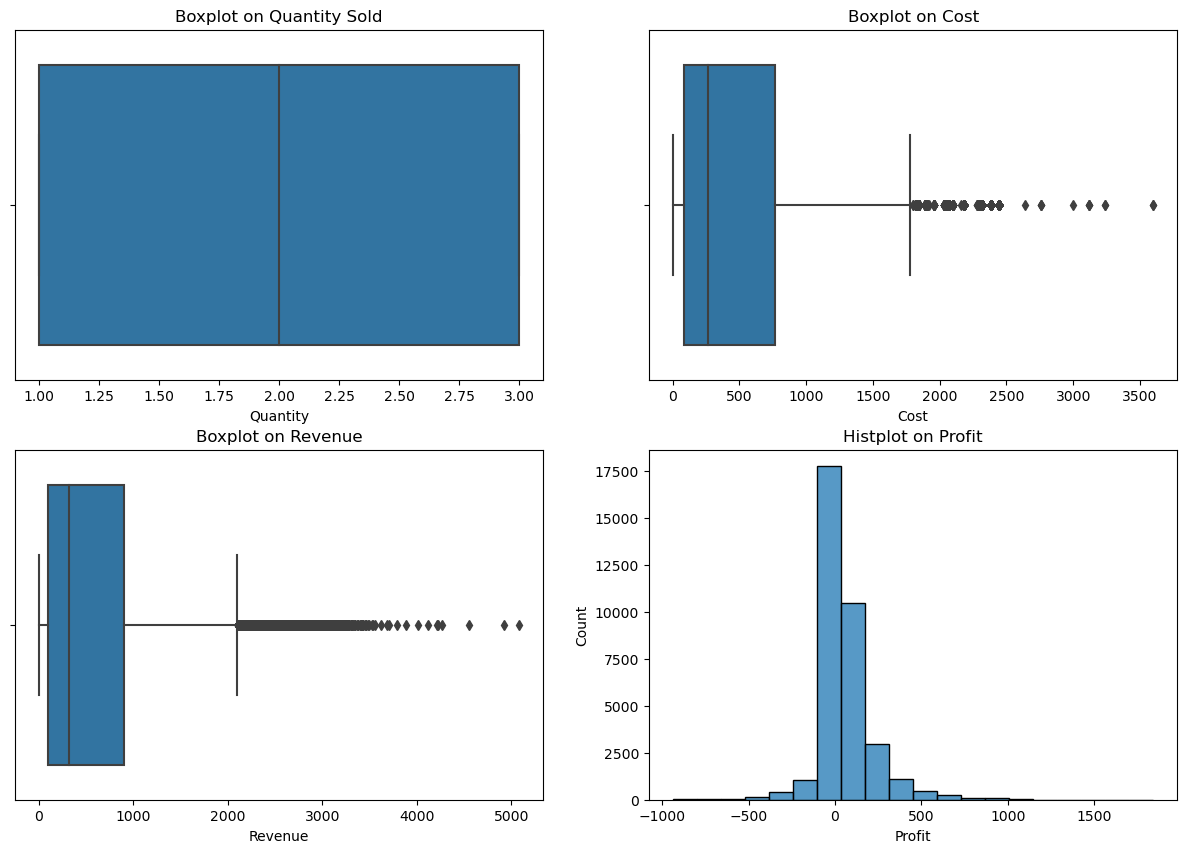

In [49]:
# Numerical Columns Such as Quantity, Costs, Revenue and Costs
# Here we are using subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

sns.boxplot(x='Quantity', data=df, ax=axs[0,0])
axs[0,0].set_title('Boxplot on Quantity Sold')

sns.boxplot(x='Cost', data=df, ax=axs[0,1])
axs[0,1].set_title('Boxplot on Cost')

sns.boxplot(x='Revenue', data=df, ax=axs[1,0])
axs[1,0].set_title('Boxplot on Revenue')

sns.histplot(x='Profit', data=df, bins=20, ax=axs[1,1])
axs[1,1].set_title('Histplot on Profit');

# BIVARIATE ANALYSIS (Focus on Profit)

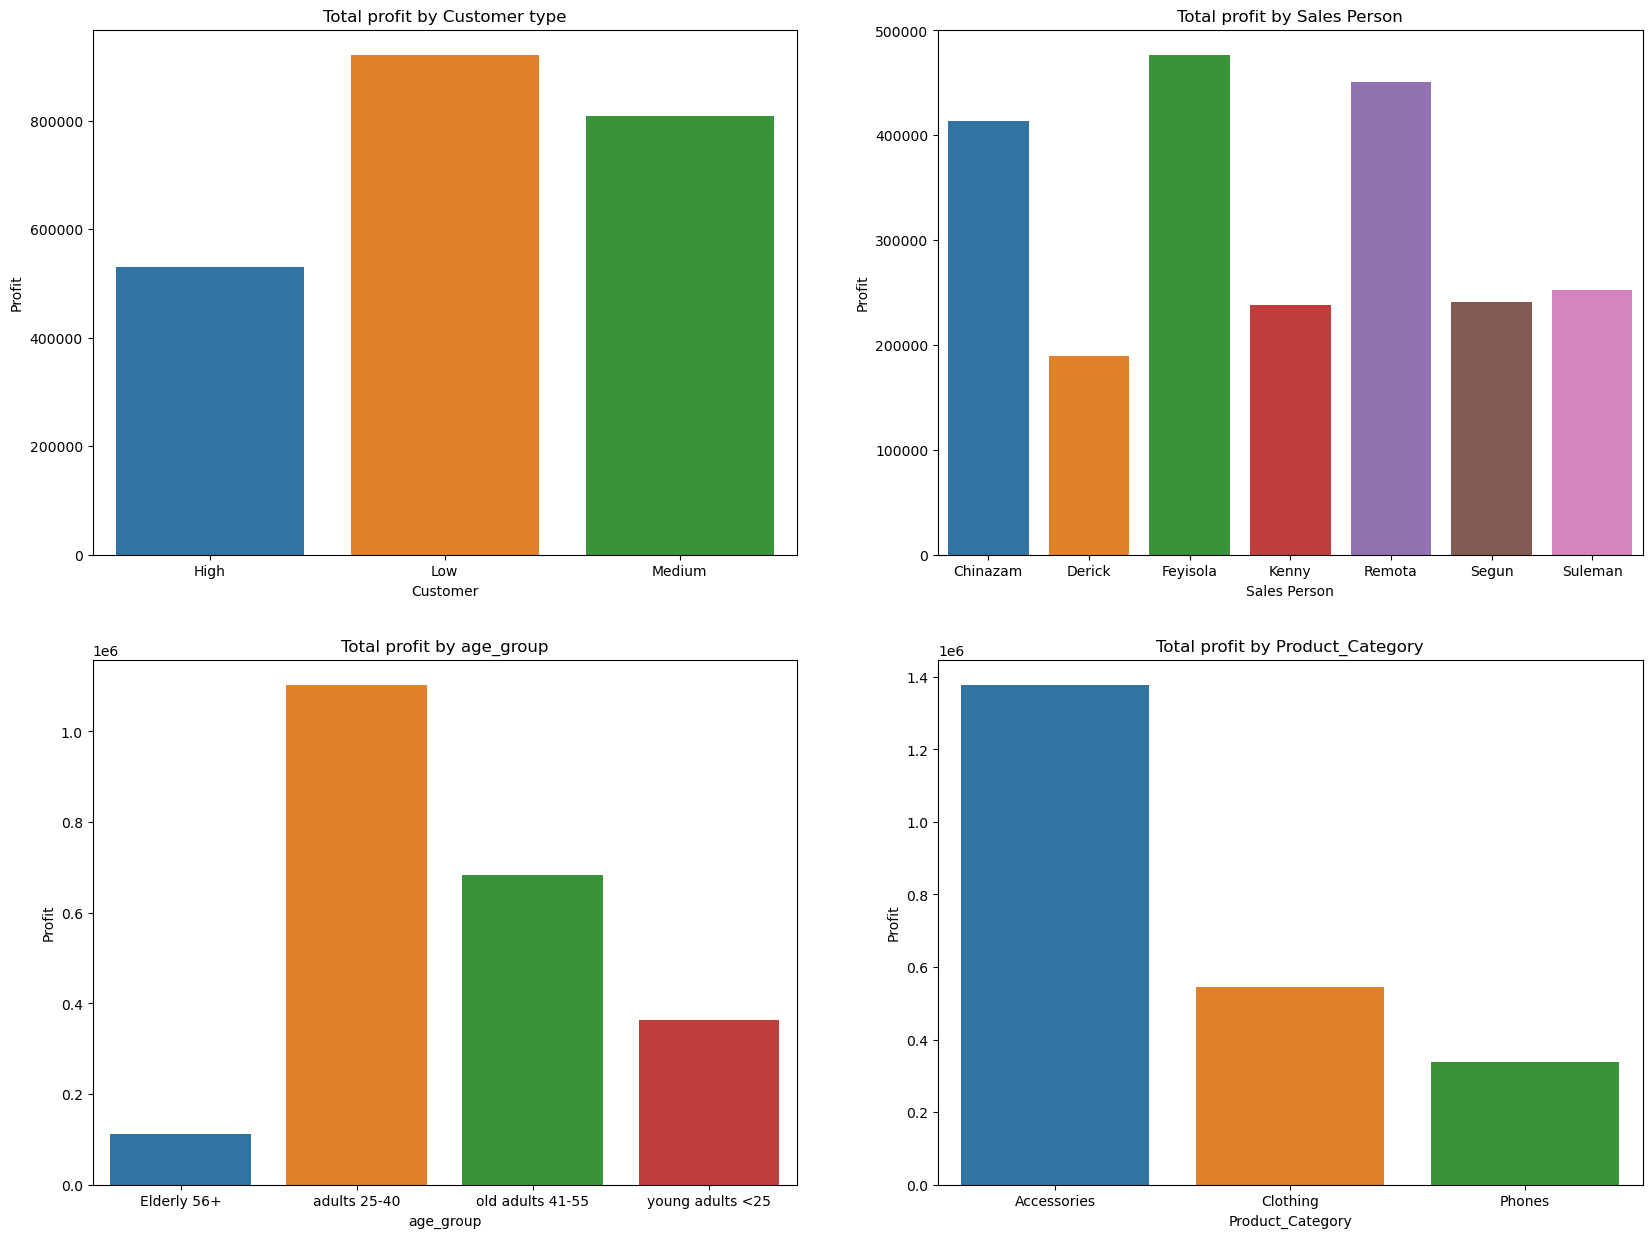

In [50]:
# Bivariate Analysis Columns Such as Quantity, Costs, Revenue and Costs
# Here we are using subplots

# Grouped the Customer,Sales person, age_group and product category by Profit and the visuals are below
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20,15))

cust_prof1 = df.groupby('Customer')['Profit'].sum().reset_index()
sns.barplot(x='Customer', data=cust_prof1, y='Profit', ax=axs[0,0])
axs[0,0].set_title('Total profit by Customer type');

sp_prof = df.groupby('Sales Person')['Profit'].sum().reset_index()
sns.barplot(x='Sales Person', data=sp_prof, y='Profit', ax=axs[0,1])
axs[0,1].set_title('Total profit by Sales Person')

ag_prof = df.groupby('age_group')['Profit'].sum().reset_index()
sns.barplot(x='age_group', data=ag_prof, y='Profit', ax=axs[1,0])
axs[1,0].set_title('Total profit by age_group');

pc_prof = df.groupby('Product_Category')['Profit'].sum().reset_index()
sns.barplot(x='Product_Category', data=pc_prof , y='Profit', ax=axs[1,1])
axs[1,1].set_title('Total profit by Product_Category');



### Insight: The Low Customer are also returning the highest profit just like we saw in the count previously.

### Insight:  Feyisola is returning the most profit, although previously, we saw Remota and Chinazam as the highest in counts, (making the highest sales)

### Insight: Adults are very prominent in returning most profit

### Insight: Accessories here also returned the most profit

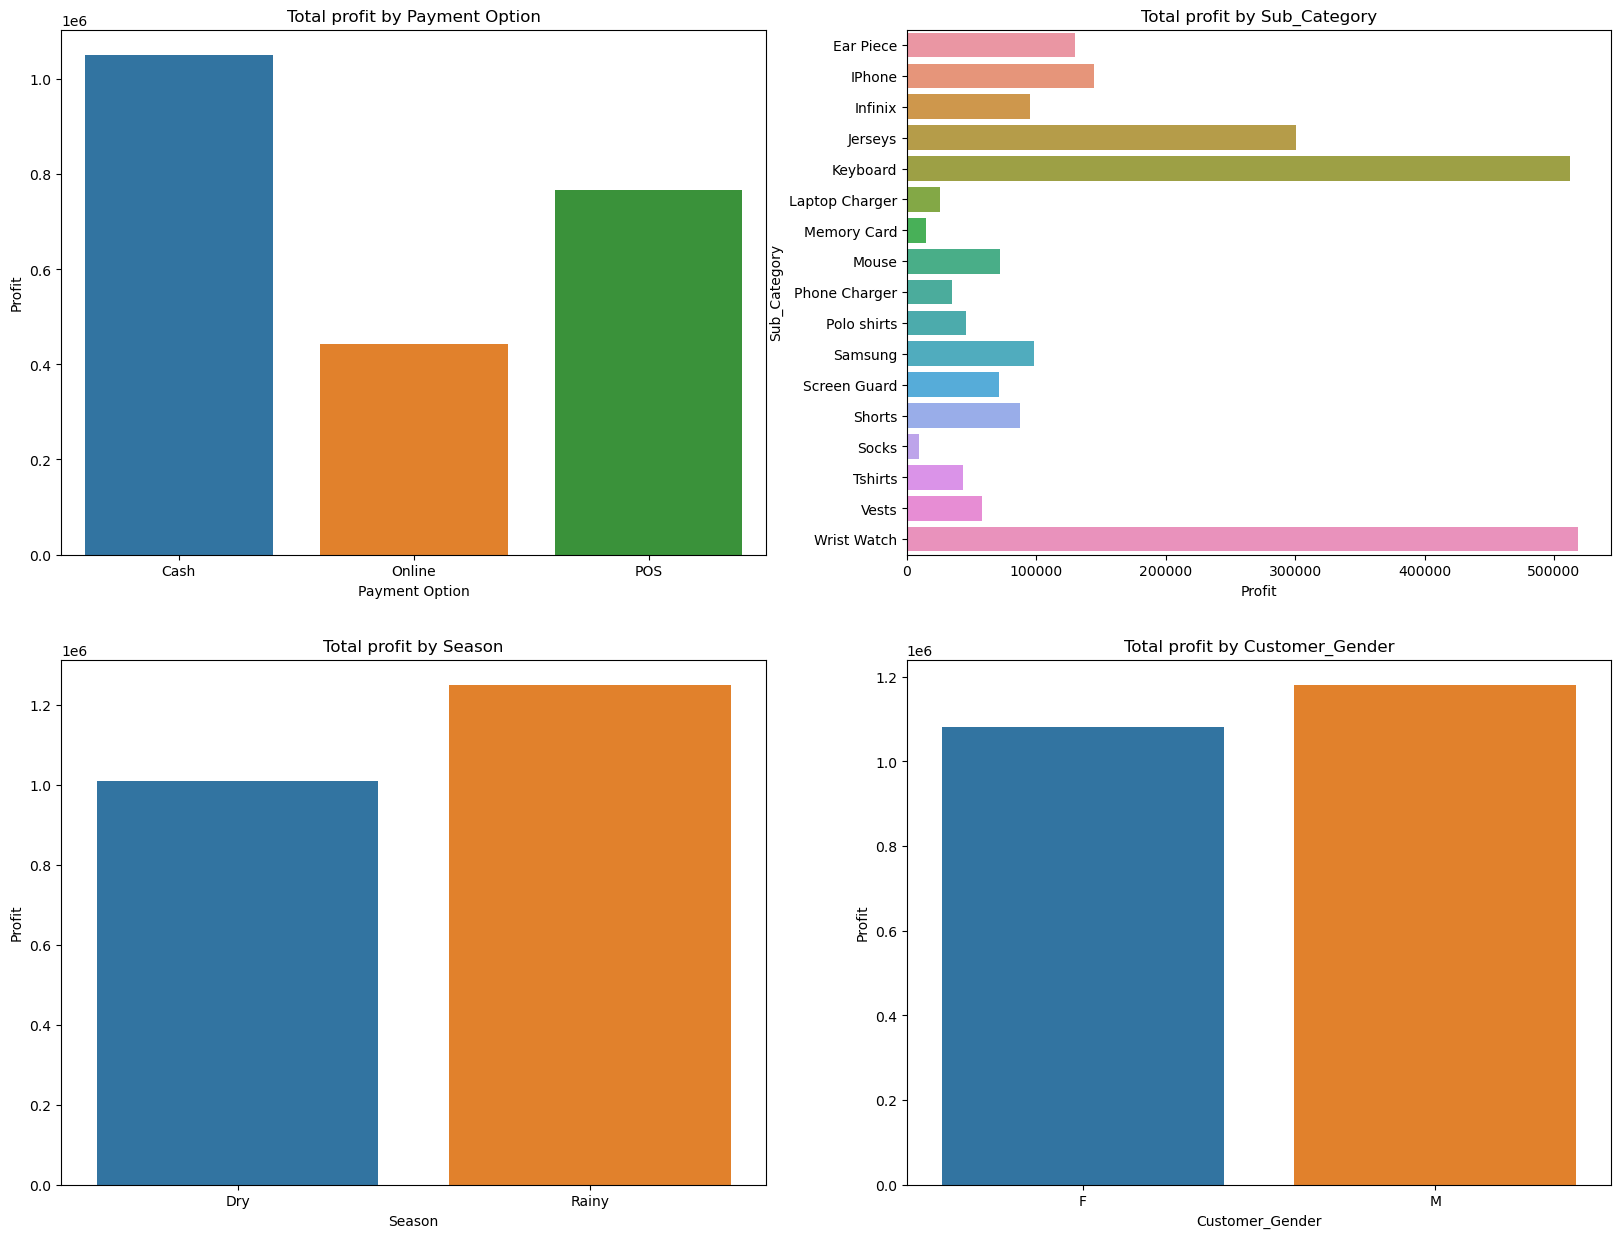

In [51]:
# Bivariate Analysis Columns Such as Paymentoption, Subcategory, Season and Customer Gender
# Here we are using subplots

# Grouped the Paymentoption, Subcategory, Season and Customer Gender by Profit and the visuals are below

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20,15))

po_prof = df.groupby('Payment Option')['Profit'].sum().reset_index()
sns.barplot(x='Payment Option', data=po_prof, y='Profit', ax=axs[0,0])
axs[0,0].set_title('Total profit by Payment Option');

sc_prof = df.groupby('Sub_Category')['Profit'].sum().reset_index()
sns.barplot(y='Sub_Category', data=sc_prof , x='Profit', ax=axs[0,1])
axs[0,1].set_title('Total profit by Sub_Category');

se_prof = df.groupby('Season')['Profit'].sum().reset_index()
sns.barplot(x='Season', data=se_prof , y='Profit', ax=axs[1,0])
axs[1,0].set_title('Total profit by Season');

cg_prof = df.groupby('Customer_Gender')['Profit'].sum().reset_index()
sns.barplot(x='Customer_Gender', data=cg_prof , y='Profit', ax=axs[1,1])
axs[1,1].set_title('Total profit by Customer_Gender');

### Insight: Cash is returning most profits followed by POS, same as observed above

### Insight: Wrist watch and keyboard are returning the most profits, followed by Jerseys and Phones

### Insight: Spring is returning the most profits followed by winter, Autum still has the least

### Insight: Contrary to the above, Male are returning most profits than female.

In [52]:
# We need to check the States with Profit and Loss
state1 = df.groupby('State')['Profit'].sum().reset_index().sort_values(by='Profit')
state1

,State,Profit
20,Kebbi,-1321.96
31,Rivers,-186.99
35,Zamfara,-74.00
28,Osun,-72.98
30,Plateau,109.00
26,Ogun,138.99
34,Yobe,177.02
33,Taraba,243.00
29,Oyo,273.00
32,Sokoto,302.00


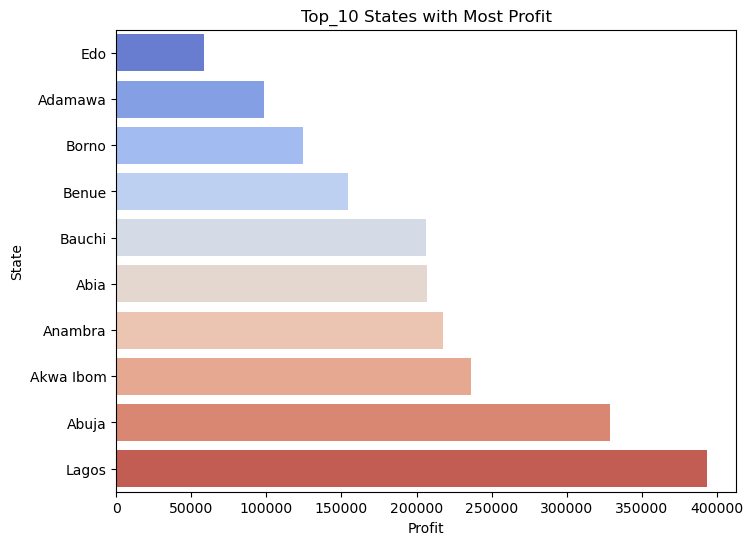

In [53]:
# Visualise the Top Ten States with Most profits
plt.figure(figsize=(8,6))
plt.title('Top_10 States with Most Profit')
sns.barplot(y='State', x='Profit', data=state1.tail(10), palette='coolwarm');

### Insight: Lagos, Abuja are returning the most profits on top 10 states

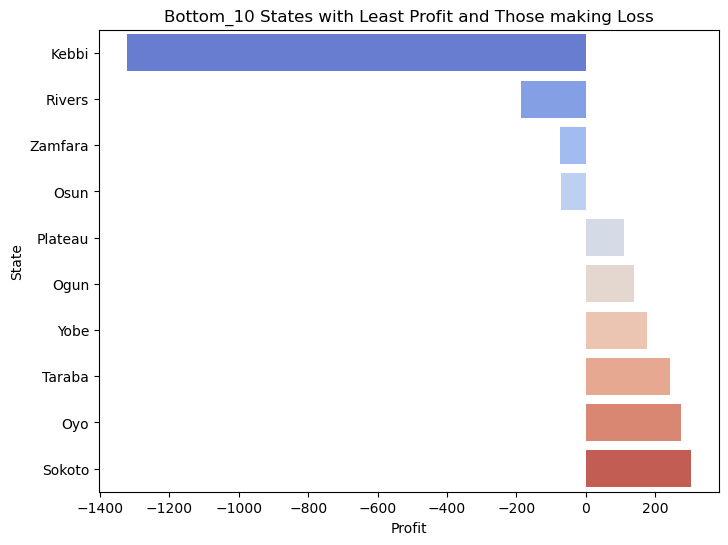

In [54]:
# Visualise the Bottom Ten States with Less profits and Some with Loss
plt.figure(figsize=(8,6))
plt.title('Bottom_10 States with Least Profit and Those making Loss')
sns.barplot(y='State', x='Profit', data=state1.head(10), palette='coolwarm');

### Insight: Kebbi State is making the most Loss followed by Rivers, Zamfara and Osum and also returning losses

## Bivariate Analysis on the Numerical Column

Text(0.5, 1.0, 'Profit returned per Month')

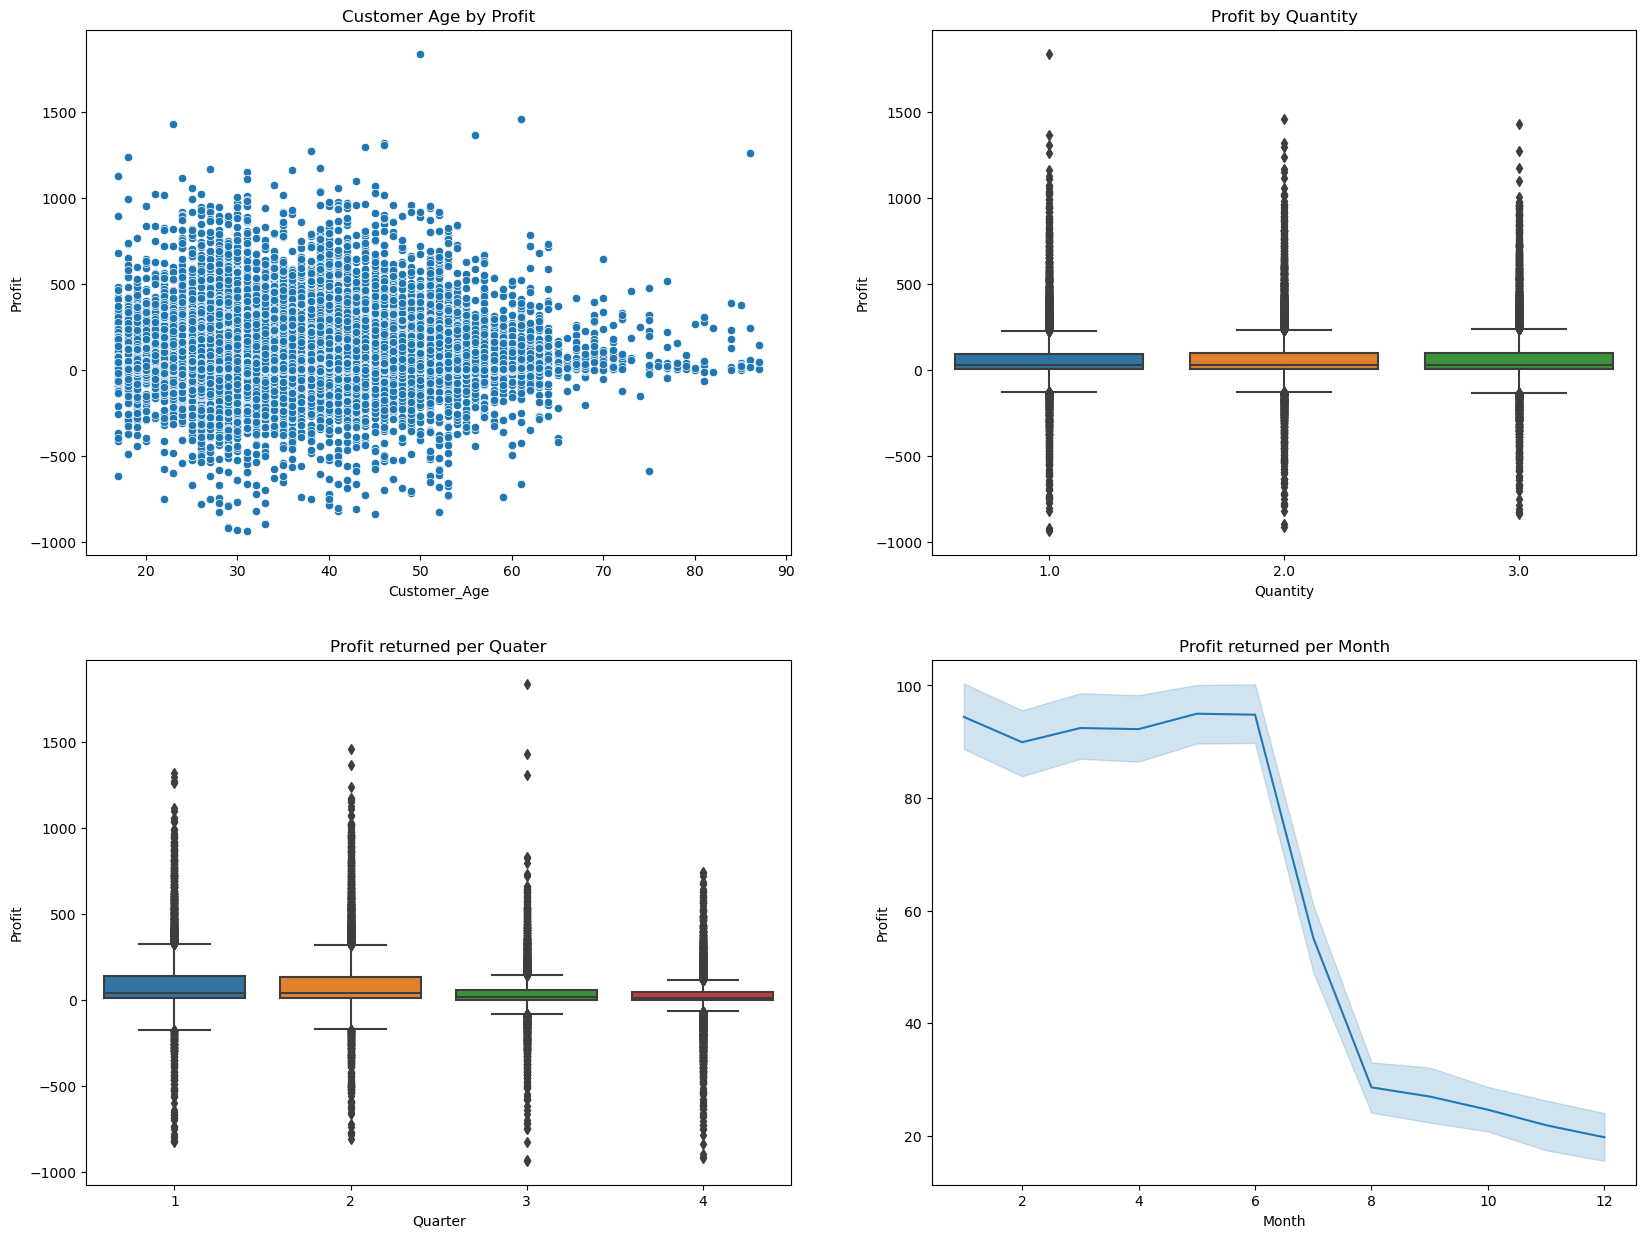

In [55]:
# Plot of Customer age, Quantity, Quater and Month against Profit

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20,15))

sns.scatterplot(x='Customer_Age', y='Profit', data=df, ax=axs[0,0])
axs[0,0].set_title('Customer Age by Profit')

sns.boxplot(x='Quantity', y='Profit', data=df, ax=axs[0,1])
axs[0,1].set_title('Profit by Quantity')

sns.boxplot(x='Quarter', y='Profit', data=df, ax=axs[1,0])
axs[1,0].set_title('Profit returned per Quater')

sns.lineplot(x='Month', y='Profit', data=df, ax=axs[1,1])
axs[1,1].set_title('Profit returned per Month')

### Insight: There is a weak correlation between the customer age and profit.

### 2. There are lot of outliers in the quantity order, but most are concentrated within a certain region

### 3. The Profit by quarter is most in the First and second Quarter, but reduces as we head towards the 3rd and 4th quarter.

### The line chart shows a steep decline in profit from Summer down to winter periods.

## Multivariate Analysis

In [56]:
# Product Category, by Profit, Revenue and Costs

procat = df.groupby('Product_Category')[['Cost','Revenue','Profit']].sum().reset_index()
procat

,Product_Category,Cost,Revenue,Profit
0,Accessories,6041876.06,7420635.12,1378759.06
1,Clothing,2892324.94,3437556.95,545232.01
2,Phones,11148745.02,11486354.63,337609.61


In [57]:
procat1 = pd.melt(procat, id_vars='Product_Category', var_name='Metric', value_name='Total')
procat1

,Product_Category,Metric,Total
0,Accessories,Cost,6041876.06
1,Clothing,Cost,2892324.94
2,Phones,Cost,11148745.02
3,Accessories,Revenue,7420635.12
4,Clothing,Revenue,3437556.95
5,Phones,Revenue,11486354.63
6,Accessories,Profit,1378759.06
7,Clothing,Profit,545232.01
8,Phones,Profit,337609.61


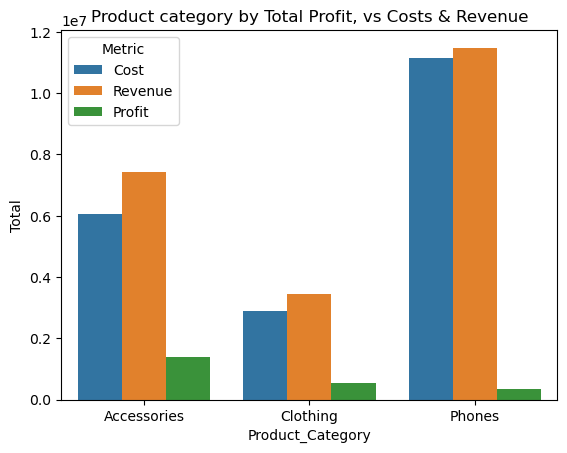

In [58]:
# Visualise the Product category against the other categories
plt.title('Product category by Total Profit, vs Costs & Revenue')
sns.barplot(data=procat1, x='Product_Category', y='Total', hue='Metric');

### Insight: Phones have high costs, high revenue, but low Profit. Accessories have more profits than phones although it had lower cost & revenue. Clothing is also low, but have a good profit

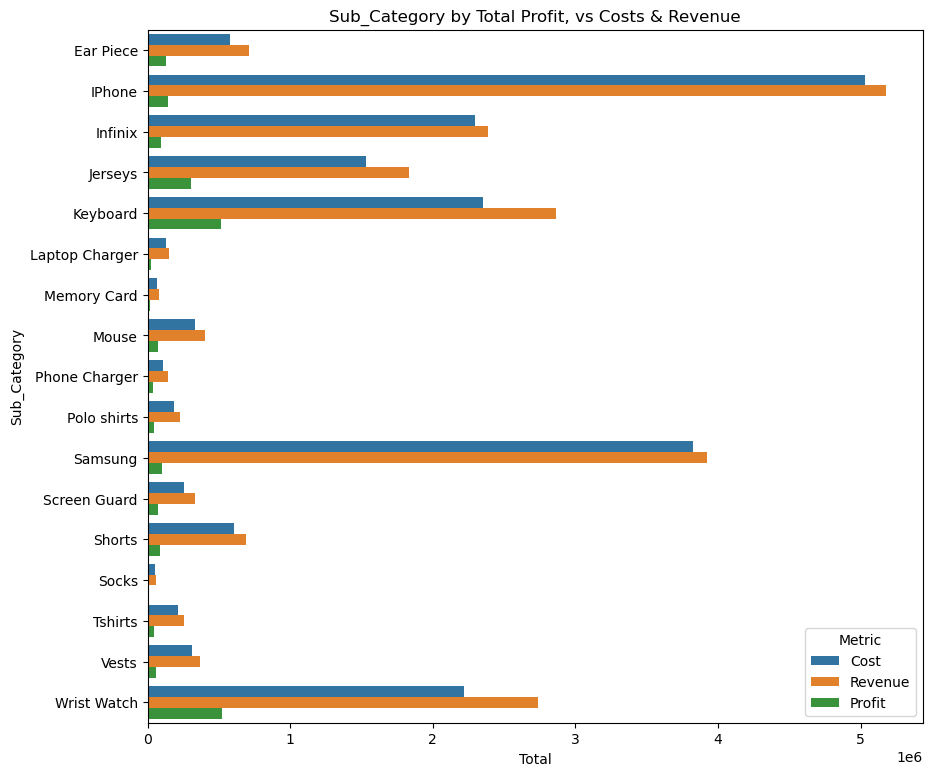

In [59]:
procat2 = df.groupby('Sub_Category')[['Cost','Revenue','Profit']].sum().reset_index()

procat3 = pd.melt(procat2, id_vars='Sub_Category', var_name='Metric', value_name='Total')

plt.figure(figsize=(10,9))
plt.title('Sub_Category by Total Profit, vs Costs & Revenue')
sns.barplot(data=procat3, y='Sub_Category', x='Total', hue='Metric');

### Insight: Wrist watch is returning the highest profit amongs all products

In [60]:
# We shall check the Profits for each year and see how each year performeed
xxx = df.groupby(['Year', 'Month'])['Profit'].sum().reset_index().sort_values(by='Month')
xxx

,Year,Month,Profit
0,2015,1,-5778.70
12,2016,1,280204.25
1,2015,2,-4079.65
13,2016,2,263640.18
2,2015,3,-8163.79
14,2016,3,299777.67
3,2015,4,-4945.69
15,2016,4,307746.51
4,2015,5,-7801.45
16,2016,5,356915.59


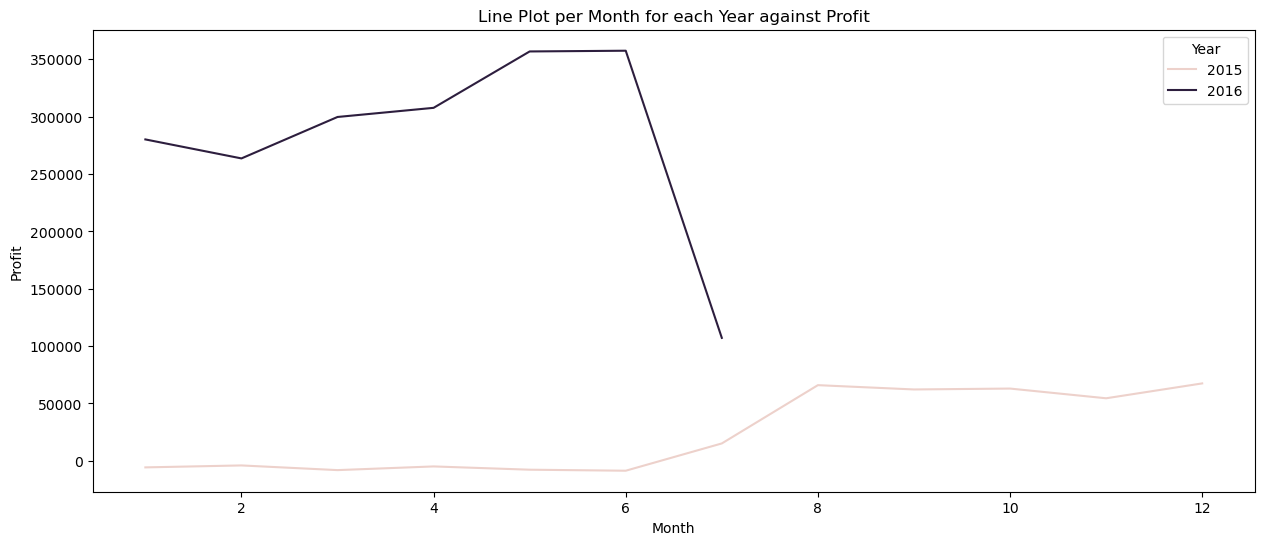

In [61]:
plt.figure(figsize=(15,6))
plt.title('Line Plot per Month for each Year against Profit')
sns.lineplot(x='Month', y='Profit', data=xxx, hue='Year');

In [62]:
# Using Pivot Table
df.pivot_table(values='Profit', index='Year', columns='Month', aggfunc='sum')

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2015,-5778.70,-4079.65,-8163.79,-4945.69,-7801.45,-8690.61,15104.47,65918.24,62172.33,62950.66,54480.9,67448.12
2016,280204.25,263640.18,299777.67,307746.51,356915.59,357549.86,107151.79,NaN,NaN,NaN,NaN,NaN


### Insight: In 2015, there was mostly losses till June, then profits was returned all through year end. However, in 2016, there has been a good profit till june, before a decline was experienced.

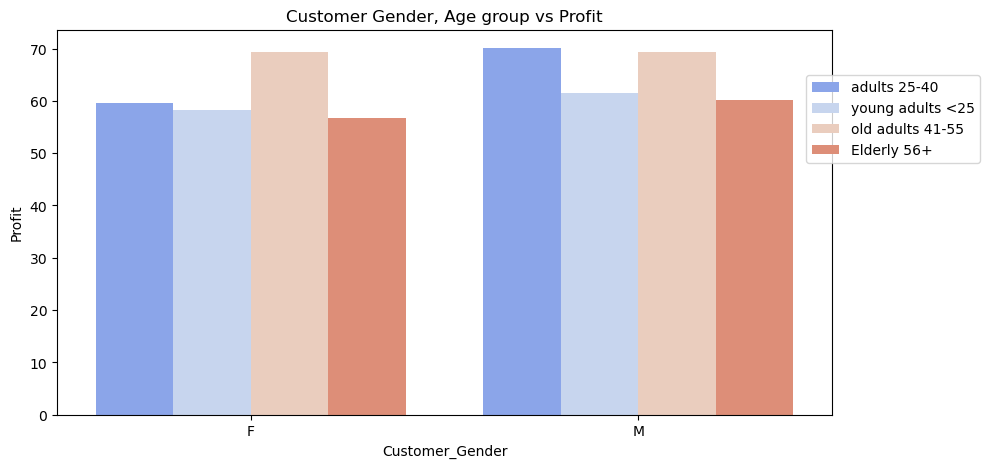

In [63]:
# Customer Gender, Age group and Profit
plt.figure(figsize=(10,5))

plt.title('Customer Gender, Age group vs Profit')
ax = sns.barplot(x='Customer_Gender', y='Profit', data=df, hue='age_group', ci=None, palette='coolwarm')
ax.legend(loc='upper right',bbox_to_anchor=(1.2, 0.9));

In [64]:
# Using Pivot Table
df.pivot_table(values='Profit', index='Customer_Gender', columns='age_group', aggfunc='sum')

age_group,Elderly 56+,adults 25-40,old adults 41-55,young adults <25
Customer_Gender,,,,
F,58685.42,509089.54,342516.80,169959.46
M,53447.04,593853.62,339923.71,194125.09


### Insight: In the Female customers, we have most profits from old adults and Elderly, but in Male customers, the profit is highest in Adults. In both gender, yooung adults have the least profits

In [65]:
# Correlation
a = df.corr()
a

,Customer_Age,Quantity,Unit_Cost,Unit_Price,Year,Month,Quarter,Cost,Revenue,Profit
Customer_Age,1.000000,0.002801,0.025372,0.026312,0.052709,-0.051619,-0.051942,0.026551,0.027777,0.013921
Quantity,0.002801,1.000000,-0.312516,-0.324111,0.000918,-0.000925,-0.000358,0.008295,0.008418,0.003097
Unit_Cost,0.025372,-0.312516,1.000000,0.981032,-0.073270,-0.018375,-0.024215,0.854906,0.836954,0.171570
Unit_Price,0.026312,-0.324111,0.981032,1.000000,-0.022653,-0.051439,-0.057173,0.832966,0.851031,0.338494
Year,0.052709,0.000918,-0.073270,-0.022653,1.000000,-0.810664,-0.812495,-0.084595,-0.025389,0.259743
Month,-0.051619,-0.000925,-0.018375,-0.051439,-0.810664,1.000000,0.971628,-0.019334,-0.058450,-0.194317
Quarter,-0.051942,-0.000358,-0.024215,-0.057173,-0.812495,0.971628,1.000000,-0.026178,-0.065212,-0.195985
Cost,0.026551,0.008295,0.854906,0.832966,-0.084595,-0.019334,-0.026178,1.000000,0.979119,0.201254
Revenue,0.027777,0.008418,0.836954,0.851031,-0.025389,-0.058450,-0.065212,0.979119,1.000000,0.396181
Profit,0.013921,0.003097,0.171570,0.338494,0.259743,-0.194317,-0.195985,0.201254,0.396181,1.000000


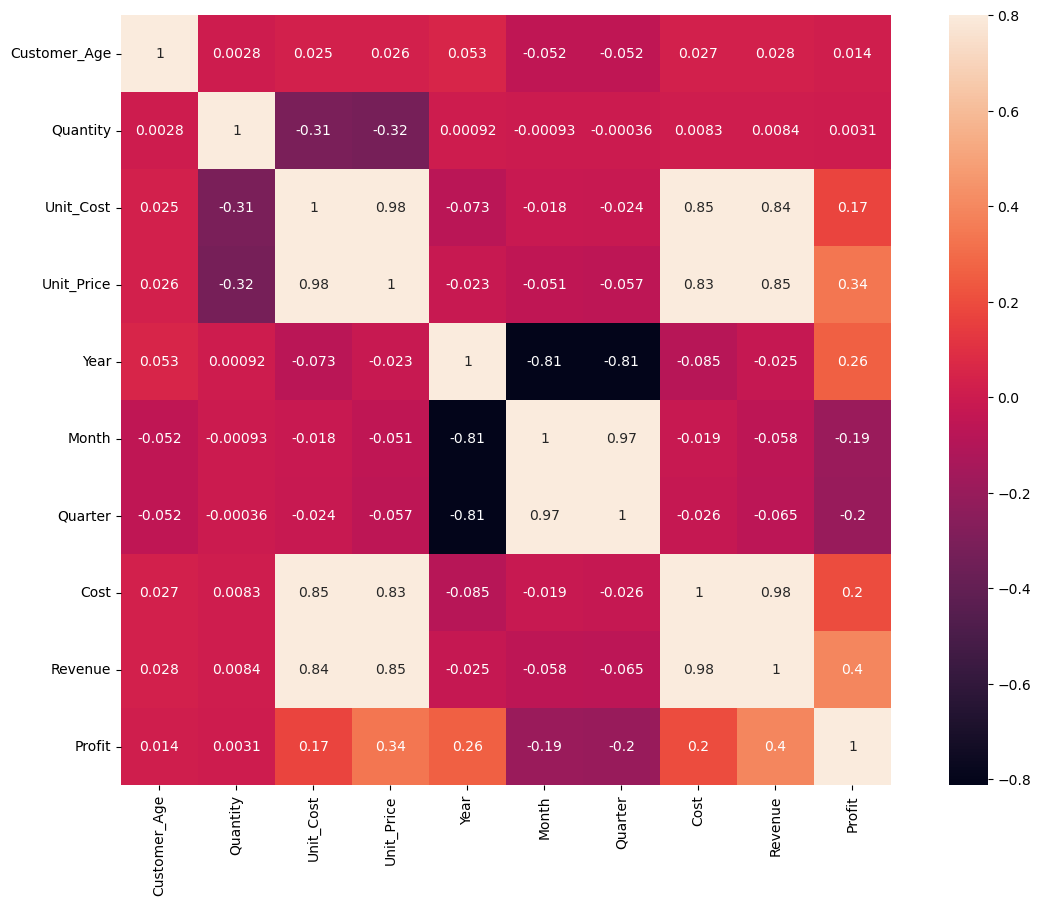

In [66]:
# Visualise the correlation
plt.figure(figsize=(15,10))
sns.heatmap(a, vmax=.8,square=True, annot=True);

### Insight: Mostly no correlation across most features with profit. Revenue have a weak correlation with profit

C:\Users\HENRY OKEOMA\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


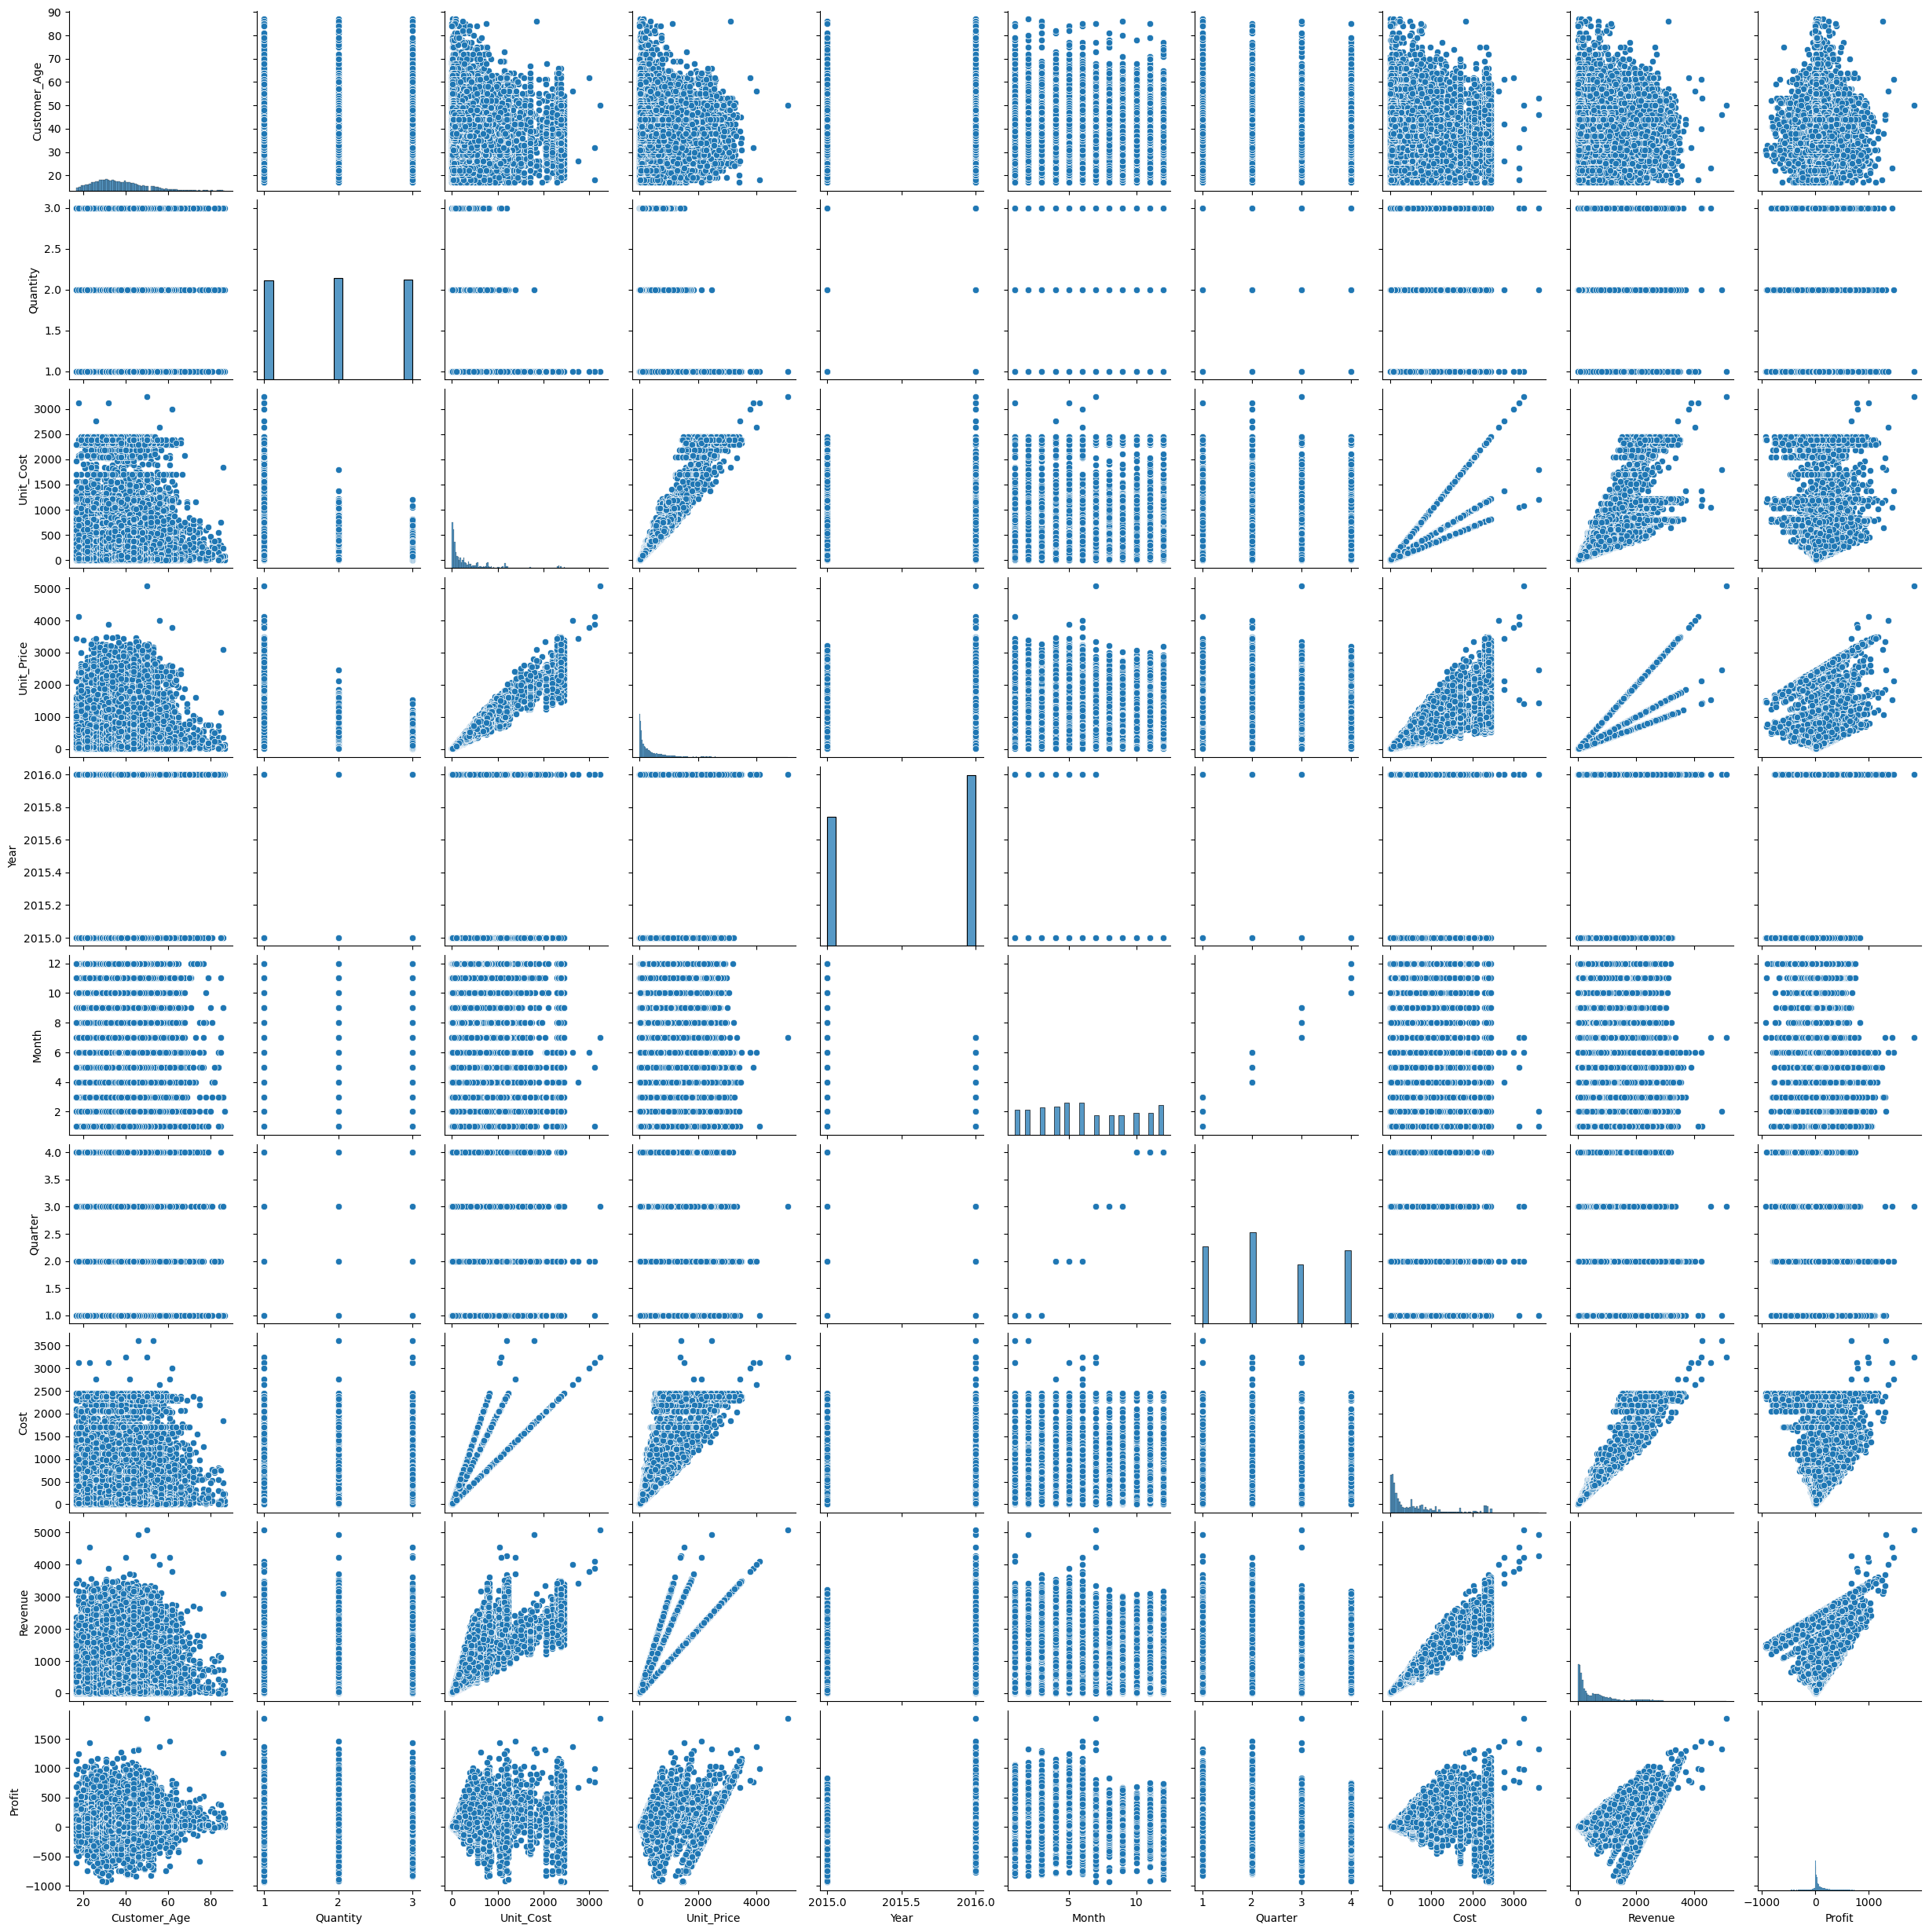

In [67]:
sns.pairplot(df, size=2.5);

### Insights: Generally, profits have a positive correlation with revenue, unit price and costs

### Final Insights and Conclusion and Recommendations
- Dunes Data have shown that some states are returning Loss, like Kebbi state which is very prominent. Also, PHC is a big city where a Profit is expected, it is not clear why the data have PHC at a loss, perhaps this may be an ares for investments such as marketting campaign and the like to boost sales in those region.

